Imports

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NBA Shot Logs - Dataset Exploration

## Basic info about the dataset

Load dataset CSV file as Pandas dataframe.

In [351]:
df = pd.read_csv('../data/raw/shot_logs.csv')

Dataframe shape - Number of rows and columns.

In [352]:
df.shape

(128069, 21)

Examples - First five rows.

In [353]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Examples - Last five rows.

In [354]:
df.tail()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127
128068,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,9,4,0:12,NaN,5,...,5.1,2,made,"Bradley, Avery",202340,2.3,1,2,jarrett jack,101127


General dataframe information - Columns, data types, and number of non-null objects per column.

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

On first look, attributes FGM and PTS seem to be perfect shot predictors. FGM shows wheter a shot was made. PTS show how many points did the shot attempt get (0 for missed shot).

Each column has only non-null elements, except for column SHOT_CLOCK.

It could be useful to convert GAME_CLOCK's values from format MM/SS to seconds. The attribute becomes numeric now.

In [356]:
def time_convert(x):
    m,s = map(int,x.split(':'))
    return m * 60 + s

In [357]:
df['GAME_CLOCK'] = df.GAME_CLOCK.apply(time_convert)

In [358]:
df['GAME_CLOCK']

0          69
1          14
2           0
3         707
4         634
         ... 
128064    112
128065    688
128066    670
128067    157
128068     12
Name: GAME_CLOCK, Length: 128069, dtype: int64

Check which columns are numeric.

In [359]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['GAME_ID',
 'FINAL_MARGIN',
 'SHOT_NUMBER',
 'PERIOD',
 'GAME_CLOCK',
 'SHOT_CLOCK',
 'DRIBBLES',
 'TOUCH_TIME',
 'SHOT_DIST',
 'PTS_TYPE',
 'CLOSEST_DEFENDER_PLAYER_ID',
 'CLOSE_DEF_DIST',
 'FGM',
 'PTS',
 'player_id']

## Descriptive Analysis

### Basic statistical information for numeric columns.

In [360]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,351.393811,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,207.590603,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,172.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,352.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,531.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


### Outliers

By reviewing the above output and attribute context my candidates for outlier checking are attributes: FINAL_MARGIN, SHOT_NUMBER, PERIOD, SHOT_DIST, DRIBBLES, TOUCH_TIME, CLOSE_DEF_DIST.

There is no meaning for outlier checking for attributes which contain ID information and for attributes which seem to be perfect shot predictors (FGM, PTS).

In [361]:
outliers_candidates = [
 'FINAL_MARGIN',
 'SHOT_NUMBER',
 'PERIOD',
 'DRIBBLES',
 'TOUCH_TIME',
 'SHOT_DIST',
 'CLOSE_DEF_DIST']

Visualise outliers with boxplots for each candidate.

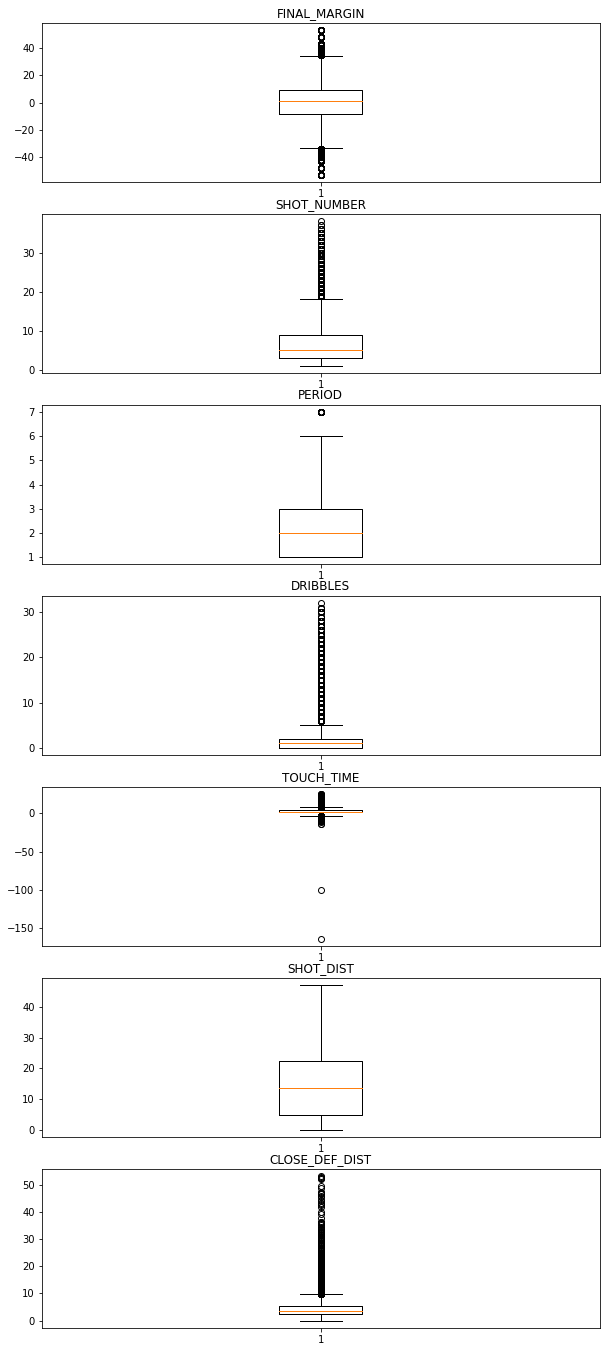

In [362]:
subplot = 1
plt.figure(figsize=(10, 24))
plt.tight_layout()
for atribute in outliers_candidates:
    plt.subplot(7, 1, subplot)
    plt.title(atribute)
    plt.boxplot(df[atribute])
    subplot += 1
plt.show()

Calculate number of outliers for each candidate.

In [363]:
def num_of_outliers(atribute):
    q1=atribute.quantile(0.25)
    q3=atribute.quantile(0.75)
    IQR=q3-q1
    outliers = atribute[((atribute<(q1-1.5*IQR)) | (atribute>(q3+1.5*IQR)))]
    return len(outliers)

In [364]:
num_outliers_per_feature = dict()
for feature in outliers_candidates:
    num_outliers_per_feature[feature] = num_of_outliers(df[feature])
num_outliers_per_feature

{'FINAL_MARGIN': 1978,
 'SHOT_NUMBER': 2638,
 'PERIOD': 43,
 'DRIBBLES': 14932,
 'TOUCH_TIME': 8181,
 'SHOT_DIST': 0,
 'CLOSE_DEF_DIST': 4583}

### Distributions

It would be useful to visualise distributions for meaningful attributes.

In [365]:
candidates = ['FINAL_MARGIN',
 'SHOT_NUMBER',
 'DRIBBLES',
 'TOUCH_TIME',
 'SHOT_DIST',
 'CLOSEST_DEFENDER_PLAYER_ID',
 'CLOSE_DEF_DIST',
 'player_id']

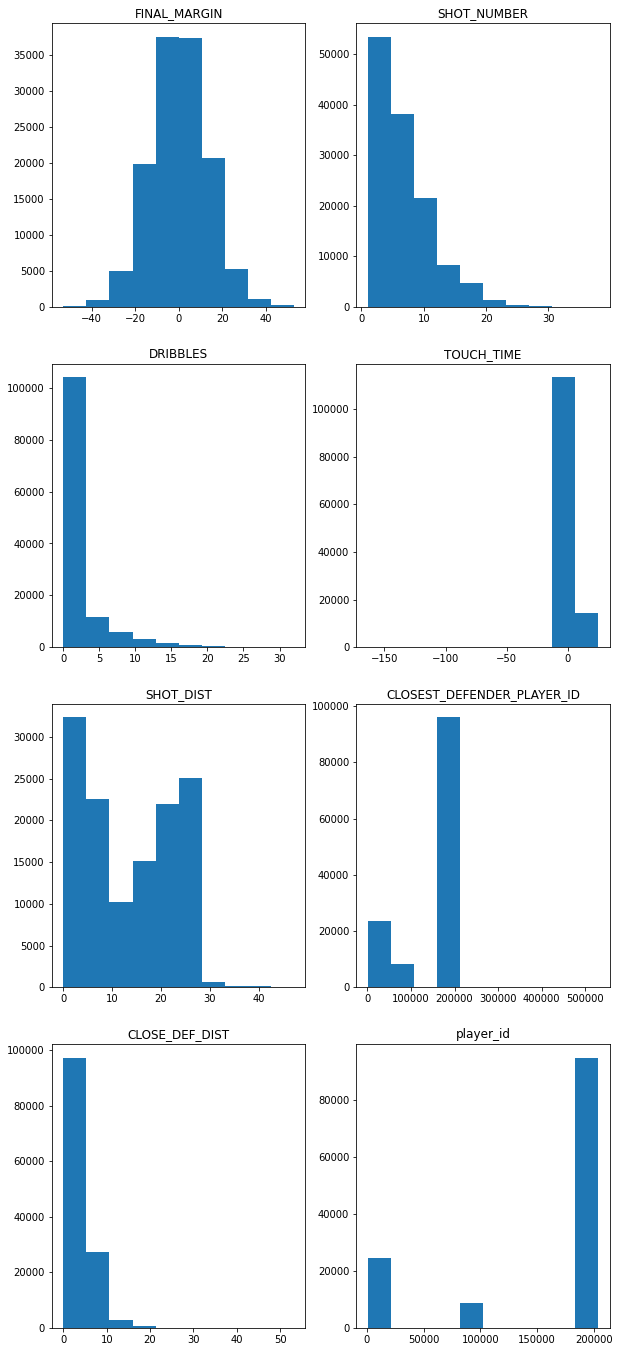

In [366]:
subplot = 1
plt.figure(figsize=(10, 24))
plt.tight_layout()
for atribute in candidates:
    plt.subplot(4, 2, subplot)
    plt.title(atribute)
    plt.hist(df[atribute])
    subplot += 1
plt.show()

### Correlation of numeric attributes

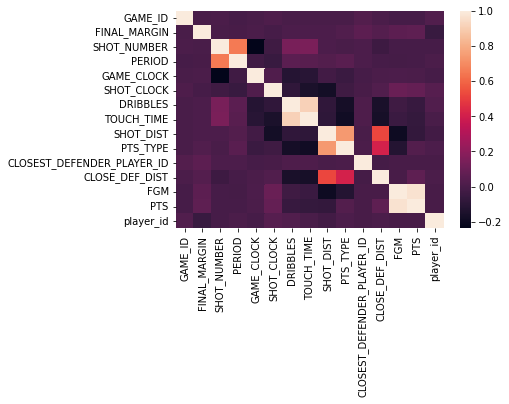

In [367]:
df_numeric = df.loc[:, df.columns.isin(numeric_columns)]
sns.heatmap(df_numeric.corr())
plt.show()

As I thought, FGM and PTS are highly correlating. Both contain information if a shot was made.

TOUCH_TIME and DRIBBLE also highly correlate. SHOT_NUMBER and PERIOD correlate significantly. Both are expected.


## Data type analysis

Unique types of data

In [368]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Counts of each data type

In [369]:
df.dtypes.value_counts()

int64      11
object      6
float64     4
dtype: int64

### Missing values

Confirm that only column SHOT_CLOCK has null elements

In [370]:
df.isnull().any()

GAME_ID                       False
MATCHUP                       False
LOCATION                      False
W                             False
FINAL_MARGIN                  False
SHOT_NUMBER                   False
PERIOD                        False
GAME_CLOCK                    False
SHOT_CLOCK                     True
DRIBBLES                      False
TOUCH_TIME                    False
SHOT_DIST                     False
PTS_TYPE                      False
SHOT_RESULT                   False
CLOSEST_DEFENDER              False
CLOSEST_DEFENDER_PLAYER_ID    False
CLOSE_DEF_DIST                False
FGM                           False
PTS                           False
player_name                   False
player_id                     False
dtype: bool

Number of null elements for column SHOT_CLOCK

In [371]:
df['SHOT_CLOCK'].isnull().sum()

5567

Percentage of null elements for column SHOT_CLOCK

In [372]:
f"{df['SHOT_CLOCK'].isnull().sum() / len(df) * 100}%"

'4.3468755124190865%'

### Monotone attributes

Check if an attribute has a roughly equal number of unique elements as there are rows in the dataframe.

In [373]:
df.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

No monotone attributes are present.

## Importance of attributes containing ID information

Since good shooters are expected to make more shots and good defenders are expected to prevent more shots, I suspect attributes with ID information will play a role in shot prediction.

My candidate attributes are: player_id and CLOSEST_DEFENDER_PLAYER_ID.

None of those attributes are monotone which goes in hand with my hypothesis.

In [374]:
candidates = ['player_id', 'CLOSEST_DEFENDER_PLAYER_ID']

Count made shots per player_id.

In [375]:
df_new = df.filter([candidates[0], 'FGM'], axis=1)
df_new = df_new[df_new['FGM'] == 1]
df_new = df_new.groupby(by=candidates[0])['FGM'].count().to_frame()
df_new.sort_values(by=['FGM'], ascending=False)

,FGM
player_id,
202696,480
2544,478
201935,474
101145,473
200746,473
...,...
2045,45
203925,41
203459,40


Count missed shots per CLOSEST_DEFENDER_PLAYER_ID.

In [376]:
df_new = df.filter([candidates[1], 'FGM'], axis=1)
df_new = df_new[df_new['FGM'] == 0]
df_new = df_new.groupby(by=candidates[1])['FGM'].count().to_frame()
df_new.sort_values(by=['FGM'], ascending=False)

,FGM
CLOSEST_DEFENDER_PLAYER_ID,
201586,480
203110,450
201599,414
2200,400
200794,393
...,...
203949,1
203495,1
203893,1
